# Information

In [210]:
#Information of an event A where P[A]>0
#Information function i_x(x) of a random variable x, 
#will be calculated with same function where p represents the probability mass distribution of the rv x
import math
def getInformation(p):
  if p>0:
    return math.log2(1/p)
  if p ==1:
    return 0
  return float('inf')

# Entropy

In [211]:
#Entropy, expectation of the information function
#param l represents the list of the probabilities of each states
def getEntropy(l):
  h = 0
  for i in range(len(l)):
    if (getInformation(l[i])) != float('inf'): #0*inf = nan in Python, unfortunately
      h += l[i]*getInformation(l[i])
  return h


# Efficiency and Redundancy

In [212]:
def getNominalInformation(l):
  return [getEntropy(l)/(math.log2(len(l))), (1-getEntropy(l)/(math.log2(len(l))))] #returns nominal information(efficiency) and redundancy

# Expected Value

In [213]:
def getExpectedValue(l):
  expected_value = 0
  for i in range(len(l)):
    expected_value += l[i]*i
  return expected_value

# Information Graphs

Text(0.5, 1.0, 'Information vs Probability of an event')

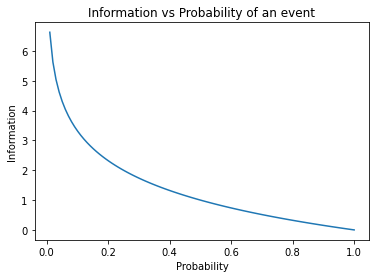

In [214]:
import numpy as np
from matplotlib import pyplot as plt
prob_values = np.linspace(0,1,100) #sampling 100 values in range [0.01,0.99] since entropy of an event which has P(event)=0 or P(event)=1 ~0 since the event is not informative
values = [i for i in range(len(prob_values))]
  

i_values_toPlot = []
for i in range(len(prob_values)):
  i_values_toPlot.append(getInformation(prob_values[i]))

plt.plot(prob_values,i_values_toPlot)
plt.xlabel("Probability")
plt.ylabel("Information")
plt.title("Information vs Probability of an event")

## Example of Entropy Calculation with Equal Probabilites

As an example, if we have a dice, our sample space is S = {1,2,3,4,5,6} where the result of rolling a dice can be. Each state has equal probabilities = 1/6. In that case, our l = { 1/6, 1/6, 1/6, 1/6, 1/6, 1/6}


In [215]:
getInformation(1/6)

2.584962500721156

In [216]:
dice_example = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
getEntropy(dice_example)

2.584962500721156

Proposition (upper bound)
Let x be a rv with a finite alphabet of M values
1. If all a ∈ Ax are equally likely with probability px(a) = 1/M, then H(x) = log2 M.
2. Otherwise, H(x) < log2 M.



In [217]:
#Entropy upper bound for the events with same probabilities
math.log2(6) == getEntropy(dice_example)

True

## Entropy calculation binary example

Text(0.5, 1.0, 'Entropy vs Probability of an event')

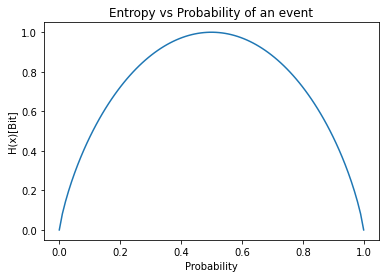

In [218]:
import numpy as np
from matplotlib import pyplot as plt
prob_values = np.linspace(0,1,100) #sampling 100 values in range [0,1] 
prob_list = []
for i in range(len(prob_values)):
  prob_list.append([prob_values[i], 1-prob_values[i]])
  
h_values_toPlot = []

for i in range(len(prob_list)):
  h_values_toPlot.append(getEntropy(prob_list[i]))
  #print(i, getEntropy(prob_list[i]))

plt.plot(prob_values, h_values_toPlot)
plt.xlabel("Probability")
plt.ylabel("H(x)[Bit]")
plt.title("Entropy vs Probability of an event")


Assuming a random variable x, has probability distiribution over N values, a represents the list of probabilities of each x =  	α.



In [219]:
import random

length = 1000
a = np.random.random(length)  
a = a/np.sum(a, axis=0) * 1  # force them to sum to totals
print(sum(a))
print(a.shape)

if (sum(a)> 1):
  max_elmnt_index = np.argmax(a)
  print(max(a), a[max_elmnt_index]) #debug
  a[max_elmnt_index] = a[max_elmnt_index] - (sum(a)-1)
  print("Fixed sum:",sum(a))
elif (sum(a)< 1):
  min_elmnt_index = np.argmin(a)
  print(min(a), a[min_elmnt_index]) #debug
  a[min_elmnt_index] = a[min_elmnt_index] + (1-sum(a))
  print("Fixed sum:",sum(a))

1.0000000000000002
(1000,)
0.001991275939724821 0.001991275939724821
Fixed sum: 1.0


In [220]:
print(type(a))
print(a.shape)

<class 'numpy.ndarray'>
(1000,)


In [221]:
efficiency,redundancy = getNominalInformation(a)
print("Efficiency of set a",efficiency)
print("Redundancy of set a",redundancy )

Efficiency of set a 0.9725110698336261
Redundancy of set a 0.02748893016637388


# Guessing Entropy

In [222]:
from math import log2
def getGuessingEntropy(l):
  inf_list = []
  for i in range(len(l)):
    inf_list.append(getInformation(l[i]))
  h_min = min(inf_list)

  log_max = math.log2(1/max(l))

  print("Minimum of its information function = ", h_min)
  print("Log of the probability of its most likely value = ", log_max)
  print("h_min == log_max:", (h_min == log_max))
  return h_min

In [223]:
getGuessingEntropy(a)

Minimum of its information function =  8.97209112925511
Log of the probability of its most likely value =  8.97209112925511
h_min == log_max: True


8.97209112925511

# Collision Entropy

In [224]:
def getCollisionEntropy(l):
  result = 0
  for i in range(len(l)):
    result+=l[i]**2 #collision prob

  return log2(1/result)

In [225]:
getCollisionEntropy(a)

9.555500690696503

# Rényi Entropy

In [226]:
def getRenyiEntropy(order,l):
  if order == 0:
    return math.log2(len(l))
  if order == 1:
    return getEntropy(l)
  if order == 2:
    return getCollisionEntropy(l)
  return getGuessingEntropy(l)

In [227]:
print("Heartler (or max-) Entropy", getRenyiEntropy(0,a))
print("Standard (Shannon) Entropy", getRenyiEntropy(1,a))
print("Collision Entropy", getRenyiEntropy(2,a))
print("Guessing Entropy", getRenyiEntropy(float("inf"),a))
print("Upper bound ~ log_2 (M)", log2(len(a)))

Heartler (or max-) Entropy 9.965784284662087
Standard (Shannon) Entropy 9.691835536407865
Collision Entropy 9.555500690696503
Minimum of its information function =  8.97209112925511
Log of the probability of its most likely value =  8.97209112925511
h_min == log_max: True
Guessing Entropy 8.97209112925511
Upper bound ~ log_2 (M) 9.965784284662087


# Joint Probability 

In [228]:
#Joint probability of independent events
def getJointProbability(alpha,beta):
  return alpha*beta

Let x and y are two i.i.d random variables 

In [229]:
import pandas as pd
import seaborn as sns

In [230]:
#Given the length of a space, this function creates random probability distributions
def createPMD(length):
  a = np.random.random(length)  
  a = a/np.sum(a, axis=0) * 1  # force them to sum to totals
  if (sum(a)> 1):
    max_elmnt_index = np.argmax(a)
    print(max(a), a[max_elmnt_index]) #debug
    a[max_elmnt_index] = a[max_elmnt_index] - (sum(a)-1)
  elif (sum(a)< 1):
    min_elmnt_index = np.argmin(a)
    print(min(a), a[min_elmnt_index]) #debug
    a[min_elmnt_index] = a[min_elmnt_index] + (1-sum(a))
  return a

In [231]:
n = 1000
x = createPMD(n)
y = createPMD(n)


7.27298389674871e-08 7.27298389674871e-08
3.014807115382438e-06 3.014807115382438e-06


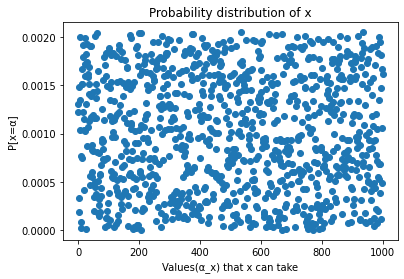

In [232]:
plt.plot([i for i in range(n)],x,'o')
plt.xlabel("Values(α_x) that x can take")
plt.ylabel("P[x=α]")
plt.title("Probability distribution of x")
plt.show()

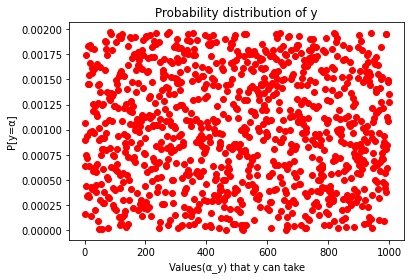

In [233]:
plt.plot([i for i in range(n)],y,'ro')
plt.xlabel("Values(α_y) that y can take")
plt.ylabel("P[y=α]")
plt.title("Probability distribution of y")
plt.show()

## Marginal Distribution

In [234]:
def getMarginalDistribution(alpha, l):
  result = 0
  for i in range(len(l)):
    result+=getJointProbability(alpha,l[i])
  return result

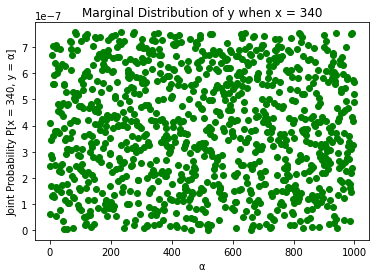

Marginal Distribution 0.0003842070785473117


In [235]:
x_index = random.randint(0,n)
joint_prob = []
for i in range(len(y)):
  joint_prob.append(getJointProbability(x[x_index],y[i]))
plt.plot(joint_prob,"go")
plt.xlabel("α")
plt.ylabel("Joint Probability P[x = {}, y = α]".format(x_index))
plt.title("Marginal Distribution of y when x = {}".format(x_index))
plt.show()

print("Marginal Distribution",getMarginalDistribution(x[x_index],y))

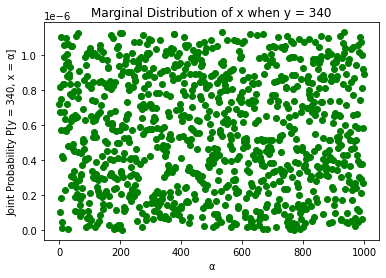

Marginal Distribution 0.0005503647218096461


In [236]:
joint_prob = []
for i in range(len(y)):
  joint_prob.append(getJointProbability(y[x_index],x[i]))
plt.plot(joint_prob,"go")
plt.xlabel("α")
plt.ylabel("Joint Probability P[y = {}, x = α]".format(x_index))
plt.title("Marginal Distribution of x when y = {}".format(x_index))
plt.show()

print("Marginal Distribution",getMarginalDistribution(y[x_index],x))

# Conditional Probability

In [237]:
def getConditionalProbability(alpha,beta):
  joint_prob = getJointProbability(alpha,beta)
  cond_prob = joint_prob/beta
  return cond_prob


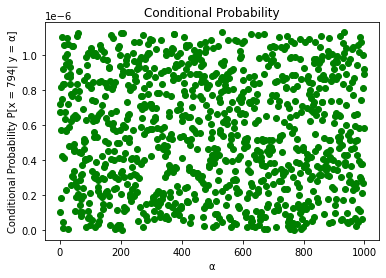

In [238]:
x_index = random.randint(0,n)
conditional_prob = []
for i in range(len(y)):
  conditional_prob.append(getConditionalProbability(x[x_index],y[i]))
plt.plot(joint_prob,"go")
plt.xlabel("α")
plt.ylabel("Conditional Probability P[x = {}| y = α]".format(x_index))
plt.title("Conditional Probability")
plt.show()

# Joint Information

In [239]:
def getJointInformation(alpha, beta): #where alpha = px(a) and beta = px(b
  #print(getConditionalProbability(alpha,beta))
  return log2(1/getConditionalProbability(alpha,beta)) - log2(1/beta)

# Joint Entropy

In [240]:
def getJointEntropy(x,y):
  result = 0
  for i in x:
    for j in y:
      result+= getJointProbability(i,j) * log2(1/getJointProbability(i,j))
  return result

In [241]:
print("Entropy of x:", getEntropy(x))
print("Entropy of y:", getEntropy(y))
print("max{H(x),H(y)}",max(getEntropy(x),getEntropy(y)) )
print("Joint entropy",getJointEntropy(x,y))
print("H(x) + H(y) = ", getEntropy(x)+getEntropy(y)) 
# if x&y are statistically independent,
# H(x,y) = H(x)+H(y)
# Otherwise, H(x,y) < H(x) + H(y)

Entropy of x: 9.672792935001628
Entropy of y: 9.699857292824259
max{H(x),H(y)} 9.699857292824259
Joint entropy 19.372650227826288
H(x) + H(y) =  19.372650227825886


# Conditional Information

In [242]:
def getConditionalInformation(alpha,beta):
  return log2(1/getConditionalProbability(alpha,beta))

# Conditional Entropy

In [243]:
def getConditionalEntropy(x,y):
  result = 0
  for i in x:
    for j in y:
      result += getConditionalProbability(i,j)*log2(1/getJointProbability(i,j))
  return result

In [244]:
random_index_x = random.randint(0,n)
random_index_y = random.randint(0,n)
print("Conditional Information = {} when x = {}, and y = {}".format(getConditionalInformation(x[random_index_x],y[random_index_y]),random_index_x,random_index_y))
print("Joint distribution ix(a, b):", getJointInformation(x[random_index_x],y[random_index_y]))
print("Information of y:", getInformation(y[random_index_y]))
print("i_x|y(a|b) = i_x(a, b) − i_y(b) :" )
print((getJointInformation(x[random_index_x],y[random_index_y])-getInformation(y[random_index_y]))==getConditionalInformation(x[random_index_x],y[random_index_y]))

Conditional Information = 10.637212424108375 when x = 725, and y = 693
Joint distribution ix(a, b): -0.23545735974079562
Information of y: 10.87266978384917
i_x|y(a|b) = i_x(a, b) − i_y(b) :
False


In [245]:
print(getJointInformation(1/6,1/6))
print((1/6)/getConditionalProbability(1/6,1/6))

0.0
1.0


In [246]:
print("Conditional Entropy:", getConditionalEntropy(x, y))
print("Joint Entropy:", getJointEntropy(x,y))
print("Entopy of x:", getEntropy(x))
print("Entopy of y:", getEntropy(y))

# print(getConditionalProbability(x[0],y[0]))
# print(log2(1/getJointProbability(x[0],y[0])))

Conditional Entropy: 20056.66913978705
Joint Entropy: 19.372650227826288
Entopy of x: 9.672792935001628
Entopy of y: 9.699857292824259


# Mutual Information

In [247]:
def getMutualInformation(x,y):
  return getEntropy(x) + getEntropy(y) -getConditionalEntropy(x,y)

In [248]:
print("Entropy of x:",getEntropy(x))
print("Entropy of y:",getEntropy(y))
print("Conditional Entropy of x,y:",getConditionalEntropy(x,y))
print("Mutual Information between x and y:",getMutualInformation(x,y))


Entropy of x: 9.672792935001628
Entropy of y: 9.699857292824259
Conditional Entropy of x,y: 20056.66913978705
Mutual Information between x and y: -20037.296489559223


# Cross Entropy

In [249]:
def getCrossEntropy(x,y):
  result = 0
  for i in range(len(x)):
    result+=x[i]*getInformation(y[i])
  return result

Binary Example

In [250]:
bx = [0.6,0.4]
by = [0.5,0.5]
print(getCrossEntropy(bx,by))
#0.6*log2(1/0.5) + 0.4*log2(1/0.5)
#print(0.6*log2(1/0.5))
#print(0.4*log2(1/0.5))

1.0


# Kullback-Leibler Divergence

In [251]:
def getKLD(x,y):
  result = 0
  for i in range(len(x)):
    result+=x[i]*log2(x[i]/y[i])
  return result

Binary Example

In [252]:
bx = [0.6,0.4]
by = [0.5,0.5]
print(getKLD(bx,by))
#0.6*log2(0.6/0.5) + 0.4*log2(0.4/0.5)
print(0.6*log2(0.6/0.5))
print(0.4*log2(0.4/0.5))
print(0.6*log2(0.6/0.5) + 0.4*log2(0.4/0.5))

0.029049405545331364
0.15782064350027628
-0.1287712379549449
0.029049405545331364


## Positivity Property 

D ($p_{x}$ || $p_{y}$) ≥ 0, ∀ $p_{x}$, $p_{y}$, and D ($p_{x}$ || $p_{y}$) = 0 if and only if $p_{x}$ ≡ $p_{y}$

Binary Example

In [253]:
bx = [0.5,0.5]
by = [0.5,0.5]
print(getKLD(bx,by))
#0.5*log2(0.5/0.5) + 0.5*log2(0.5/0.5) ~ log (a/a =1) = 0 anyways
print(0.5*log2(0.5/0.5))
print(0.5*log2(0.5/0.5))
print(0.5*log2(0.5/0.5) + 0.5*log2(0.5/0.5))

0.0
0.0
0.0
0.0


## Asymmetry Property

D ($p_{x}$ || $p_{y}$) ≠ D ($p_{y}$ || $p_{x}$)

unless $p_{x}$ ≡ $p_{y}$

In [254]:
print("D ( 𝑝𝑥 || 𝑝𝑦 ) = ", getKLD(x,y))
print("D ( 𝑝y || 𝑝x ) = ", getKLD(y,x))

D ( 𝑝𝑥 || 𝑝𝑦 ) =  0.741562785679675
D ( 𝑝y || 𝑝x ) =  0.7639694489348794


## Relation with Entropy

If x, y are discrete and y ∼ U($A_{x}$), 

D ($p_{x}$ || $p_{y}$) = H(y) − H(x).

In [255]:
z = [1/n for i in range(n)]
print("KLD(px,pz) = {} where z ∼ U( 𝐴𝑥 )".format(getKLD(x,z)))
print("H(z) − H(x) = ", getEntropy(z) - getEntropy(x))


KLD(px,pz) = 0.2929913496604707 where z ∼ U( 𝐴𝑥 )
H(z) − H(x) =  0.2929913496603902


## Relation with Cross Entropy

If x, y are discrete, 

D ($p_{x}$ || $p_{y}$) = H($p_{x}$ ; $p_{y}$) - H(x).

In [256]:
print("KLD(px,py)",getKLD(x,y))
print("(Cross Entropy = {}) - (Entropy of x ={}) = {}".format(
    getCrossEntropy(x,y),
    getEntropy(x),
    (getCrossEntropy(x,y) - getEntropy(x))))


KLD(px,py) 0.741562785679675
(Cross Entropy = 10.414355720681282) - (Entropy of x =9.672792935001628) = 0.7415627856796547


# Create Data

In [257]:
import random 

K = 4
#works only for 7,4

def encode(s):
    # Read in K=4 bits at a time and write out those plus parity bits
    while len(s) >= K:
        nibble = s[0:K]
        #print(hamming(nibble))
        s = s[K:]
    return hamming(nibble)

def hamming(bits):
    # Return given 4 bits plus parity bits for bits (1,2,3), (2,3,4) and (1,3,4)
    t1 = parity(bits, [0,1,3])
    t2 = parity(bits, [0,2,3])
    t3 = parity(bits, [1,2,3])
    return bits + t1 + t2 + t3  #again saying, works only for 7,4

def parity(s, indicies):
    # Compute the parity bit for the given string s and indicies
    sub = ""
    for i in indicies:
        sub += s[i]
    return str(str.count(sub, "1") % 2)

In [258]:
def generateAllBinaryStrings(n):
    i = 0
    a = []
    while(i<2**n):
      a.append(bin(i)[2:].zfill(n))
      i+=1
    return a
    

In [259]:
n_bits = 4
msg_space = generateAllBinaryStrings(n_bits)
ciphers =[]

for i in msg_space:
  h = encode(i)
  k = ''
  for j in range(0, len(h)):      #calculate binary complement
        if(h[j]=='0'):
            k = k + '1'
        if(h[j]=='1'):
            k = k + '0'
  rn = random.randint(0, 1)      #random value equal to 0 or 1
  cipher = ''
  if(rn == 0):         #set x equal to encoded text or its complement with probability 50%
      cipher = h
  else:
      cipher = k
  ciphers.append(cipher)

In [260]:
data_set = {"u":msg_space, "x":ciphers}
df = pd.DataFrame(data_set)
df

,u,x
0,0000,1111111
1,0001,0001111
2,0010,1101100
3,0011,1100011
4,0100,0100101
5,0101,1010101
6,0110,1001001
7,0111,1000110
8,1000,0111001
9,1001,0110110


In [261]:
#p_u = (1/len(df))*[1]
df["p_u"] = 1/len(df) #uniform distribution
x_dict = dict()
for i in range(len(df)):
  if df.x.iloc[i] in x_dict:
    x_dict[df.x.iloc[i]] +=1/len(df)
  else:
    x_dict[df.x.iloc[i]] =1/len(df)
x_dict

{'0001111': 0.125,
 '0100101': 0.125,
 '0110110': 0.0625,
 '0111001': 0.0625,
 '1000110': 0.0625,
 '1001001': 0.0625,
 '1010101': 0.125,
 '1100011': 0.125,
 '1101100': 0.125,
 '1111111': 0.125}

In [262]:
p_x = []
for i in range(len(df)):
  p_x.append(x_dict[df.x.iloc[i]])
df["p_x"] = p_x
df

,u,x,p_u,p_x
0,0000,1111111,0.0625,0.1250
1,0001,0001111,0.0625,0.1250
2,0010,1101100,0.0625,0.1250
3,0011,1100011,0.0625,0.1250
4,0100,0100101,0.0625,0.1250
5,0101,1010101,0.0625,0.1250
6,0110,1001001,0.0625,0.0625
7,0111,1000110,0.0625,0.0625
8,1000,0111001,0.0625,0.0625
9,1001,0110110,0.0625,0.0625


In [263]:
p_cond = [] 
p_joint = []
i_u = []
i_x = []
i_cond = []
i_joint = []

for i in range(len(df)):
  p_cond.append(getConditionalProbability(df.p_u.iloc[i],df.p_x.iloc[i]))
  p_joint.append(getJointProbability(df.p_u.iloc[i],df.p_x.iloc[i]))
  i_u.append(getInformation(df.p_u.iloc[i]))
  i_x.append(getInformation(df.p_x.iloc[i]))
  i_cond.append(getConditionalInformation(df.p_u.iloc[i],df.p_x.iloc[i]))
  i_joint.append(getJointInformation(df.p_u.iloc[i],df.p_x.iloc[i]))

df["p_cond"] = p_cond
df["p_joint"] = p_joint
df["i_u"] = i_u
df["i_x"] = i_x
df["i_cond"] = i_cond
df["i_joint"] = i_joint
df

,u,x,p_u,p_x,p_cond,p_joint,i_u,i_x,i_cond,i_joint
0,0000,1111111,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
1,0001,0001111,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
2,0010,1101100,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
3,0011,1100011,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
4,0100,0100101,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
5,0101,1010101,0.0625,0.1250,0.0625,0.007812,4.0,3.0,4.0,1.0
6,0110,1001001,0.0625,0.0625,0.0625,0.003906,4.0,4.0,4.0,0.0
7,0111,1000110,0.0625,0.0625,0.0625,0.003906,4.0,4.0,4.0,0.0
8,1000,0111001,0.0625,0.0625,0.0625,0.003906,4.0,4.0,4.0,0.0
9,1001,0110110,0.0625,0.0625,0.0625,0.003906,4.0,4.0,4.0,0.0


In [264]:
print("Entropy of u: ", getEntropy(df.p_u))
print("Entropy of x: ", getEntropy(df.p_x))
print("Conditional Entropy: ", getConditionalEntropy(df.p_u,df.p_x))
print("Joint Entropy: ", getJointEntropy(df.p_u,df.p_x))
print("Cross Entropy: ", getCrossEntropy(df.p_u,df.p_x))
print("KLD", getKLD(df.p_x,df.p_u))

Entropy of u:  4.0
Entropy of x:  5.5
Conditional Entropy:  116.0
Joint Entropy:  12.5
Cross Entropy:  3.25
KLD 1.5


# Typical Sequences

Given that N(a)/n is "close" to p_x(a), where N(a) is the number of occurences of a in the sequence, n is the length of the sequence and p_x(a) is the probability distribution of a.

I wrote a function to create sequences with given pmds, based on that I could observe that N(a)/n is close to p_x(a).

As a first example, I created a binary sequence with length 10000, px(0) = 0.6 and px(1) = 0.4. Results are N(0)/10000 = 0.5976, and N(1)/10000 = 0.4024.





In [265]:
import numpy as np

def createSeq(length_of_sequence, prob_list):
  arr =[]
  for i in range(length_of_sequence):
    arr.append(np.random.choice(np.arange(0,2), p=prob_list))
  relative_freq_dic = dict()
  for i in arr:
    if i in relative_freq_dic:
      relative_freq_dic[i]+=1
    else:
      relative_freq_dic[i]=1
  print(relative_freq_dic)
  for i in relative_freq_dic:
    print("N({})/n={}".format(i,relative_freq_dic[i]/length_of_sequence))
  return arr, relative_freq_dic
seq, relative_freq_dic = createSeq(10000,[0.6,0.4])

{1: 4071, 0: 5929}
N(1)/n=0.4071
N(0)/n=0.5929


According to the definition of the strongly epsilon-typical sequences, I find the proper epsilon values to the given example.

In [266]:
#Strongly typical
#px(a) ~ N(a)/n 
#N(a) ~ px(a)*n
probability_list = [0.6,0.4]
relative_freq_list = []
length_of_sequence = 10000
for i in relative_freq_dic:
  relative_freq_list.append(relative_freq_dic[i]/length_of_sequence)
  
def findStronglyTypical(relative_freq_list,probability_list):
  epsilon_list = []
  for i in range(len(relative_freq_list)):
    epsilon_local =[]
    for eps in np.arange(0.0, 1.0, 0.01):
      if probability_list[i]*(1-eps)< relative_freq_list[i] and probability_list[i]*(1+eps)> relative_freq_list[i]:
        epsilon_local.append(eps)
    epsilon_list.append(epsilon_local)
  return epsilon_list
print(relative_freq_list)
epsilons = findStronglyTypical(relative_freq_list,probability_list)
print(epsilons[0])
print(epsilons[1])
print("Possible Epsilon values for strongly epsilon-typical sequence", set(epsilons[0]) & set(epsilons[1]))

[0.4071, 0.5929]
[0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99]
[0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99]
Possible Epsilon values for strongly epsi

In [267]:
#px(0) = 0.25, px(1) = 0.75
from sympy import symbols, Eq, solve
plist = [0.25,0.75]
print("i(0)",getInformation(0.25))
print("i(1)",getInformation(0.75))
print("Entropy", getEntropy([0.25,0.75]))
print("getEntropy(plist) + epsilon",getEntropy(plist) + 0.15)
print("hic",(2*getInformation(plist[0])+4*getInformation(plist[1]))/6)
print("getEntropy(plist) - epsilon",getEntropy(plist) - 0.15)
print(sum([getInformation(i) for i in plist])/n)
def getTypical(epsilon, n, plist):
  seqs = []
  s = sum([getInformation(i) for i in plist])/n
  s1=1
  s2 = n-s1
  noOfIterations = 10000
  while s1 < s2 :
    s2 = n-s1
    while(s< getEntropy(plist) + epsilon) and (s1+s2 ==n) and s1 < s2:
      s = (s1*getInformation(plist[0]) + s2*getInformation(plist[1]))/n
      if  s/n < getEntropy(plist) +epsilon:
        seqs.append([s1,s2])
      s2+=1
    s1+=1
    s = sum([getInformation(i) for i in plist])/n
    noOfIterations-=1
  return seqs
epsilon = 0.15
length = 6
print("pmd = {}, epsilon = {}, length = {}, sequences ={}".format(plist,epsilon,length, getTypical(epsilon,length,plist)))


def epsilonVariations(plist, length):
  for eps in np.arange(0.001, 1.01, 0.05):
    print("pmd = {}, epsilon = {}, length = {}, sequences ={}".format(plist,eps,length, getTypical(eps,length,plist)))

print("\n\n")
print("p(0) = 0, p(1) = 1")
plist = [0,1]
epsilonVariations(plist,length)

print("\n\n")
print("p(0) = 0.05, p(1) = 0.95")
plist = [0.05,0.95]
epsilonVariations(plist,length)

print("\n\n")
print("p(0) = 0.1, p(1) = 0.9")
plist = [0.1,0.9]
epsilonVariations(plist,length)

print("\n\n")
print("p(0) = 0.15, p(1) = 0.85")
plist = [0.15,0.85]
epsilonVariations(plist,length)

print("p(0) = 0.20, p(1) = 0.80")
plist = [0.20,0.80]
epsilonVariations(plist,length)


print("p(0) = 0.25, p(1) = 0.75")
plist = [0.25,0.75]
epsilonVariations(plist,length)

print("p(0) = 0.30, p(1) = 0.70")
plist = [0.30,0.70]
epsilonVariations(plist,length)

print("p(0) = 0.35, p(1) = 0.65")
plist = [0.35,0.65]
epsilonVariations(plist,length)

print("p(0) = 0.40, p(1) = 0.60")
plist = [0.40,0.60]
epsilonVariations(plist,length)

print("p(0) = 0.5, p(1) = 0.5")
plist = [0.5,0.5]
epsilonVariations(plist,length)

i(0) 2.0
i(1) 0.4150374992788437
Entropy 0.8112781244591327
getEntropy(plist) + epsilon 0.9612781244591327
hic 0.9433583328525624
getEntropy(plist) - epsilon 0.6612781244591327
0.002415037499278844
pmd = [0.25, 0.75], epsilon = 0.15, length = 6, sequences =[[1, 5], [2, 4]]



p(0) = 0, p(1) = 1
pmd = [0, 1], epsilon = 0.001, length = 6, sequences =[]
pmd = [0, 1], epsilon = 0.051000000000000004, length = 6, sequences =[]
pmd = [0, 1], epsilon = 0.101, length = 6, sequences =[]
pmd = [0, 1], epsilon = 0.15100000000000002, length = 6, sequences =[]
pmd = [0, 1], epsilon = 0.201, length = 6, sequences =[]
pmd = [0, 1], epsilon = 0.251, length = 6, sequences =[]
pmd = [0, 1], epsilon = 0.30100000000000005, length = 6, sequences =[]
pmd = [0, 1], epsilon = 0.35100000000000003, length = 6, sequences =[]
pmd = [0, 1], epsilon = 0.401, length = 6, sequences =[]
pmd = [0, 1], epsilon = 0.451, length = 6, sequences =[]
pmd = [0, 1], epsilon = 0.501, length = 6, sequences =[]
pmd = [0, 1], epsilo

As a result of variations on epsilon value, we can observe that, when epsilon is a  slightly small number, the boundries of the average information per symbol is very similar to the entropy of the x, therefore we cannot find the satisfying combinations.

When the observed the variations in probability of the symbols, since if we have a sequence with a low entropy, like a sequence with all zeros or ones, we cannot find pairs.

In [268]:
#Variations on length
print("\n\n")
length = 100
print("p(0) = 0, p(1) = 1")
plist = [0,1]
epsilonVariations(plist,length)

print("\n\n")
print("p(0) = 0.05, p(1) = 0.95")
plist = [0.05,0.95]
epsilonVariations(plist,length)

print("\n\n")
print("p(0) = 0.1, p(1) = 0.9")
plist = [0.1,0.9]
epsilonVariations(plist,length)

print("\n\n")
print("p(0) = 0.15, p(1) = 0.85")
plist = [0.15,0.85]
epsilonVariations(plist,length)

print("p(0) = 0.20, p(1) = 0.80")
plist = [0.20,0.80]
epsilonVariations(plist,length)


print("p(0) = 0.25, p(1) = 0.75")
plist = [0.25,0.75]
epsilonVariations(plist,length)

print("p(0) = 0.30, p(1) = 0.70")
plist = [0.30,0.70]
epsilonVariations(plist,length)

print("p(0) = 0.35, p(1) = 0.65")
plist = [0.35,0.65]
epsilonVariations(plist,length)

print("p(0) = 0.40, p(1) = 0.60")
plist = [0.40,0.60]
epsilonVariations(plist,length)

print("p(0) = 0.5, p(1) = 0.5")
plist = [0.5,0.5]
epsilonVariations(plist,length)




p(0) = 0, p(1) = 1
pmd = [0, 1], epsilon = 0.001, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.051000000000000004, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.101, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.15100000000000002, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.201, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.251, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.30100000000000005, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.35100000000000003, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.401, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.451, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.501, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.551, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.6010000000000001, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.651, length = 100, sequences =[]
pmd = [0, 1], epsilon = 0.7010000000000001, length = 100, sequences =[]
pmd = [0, 

As a result, we can conclude that with larger n (length of the sequence), we can find more pairs which are epsilon-typical. It is because the Asymptotic Equation Property, which states that the probability of a sequence is typical will be always equal to 1 when the length of the symbols approaches to infinity.

# Node Purity in a Decision Tree with Entropy


Entropy is the measure of disorder, and also measure of purity. If entropy is 0.5, we can conclude that disorder is high and purity is low because it represents that our node has equally likely similar positive and negative samples. 

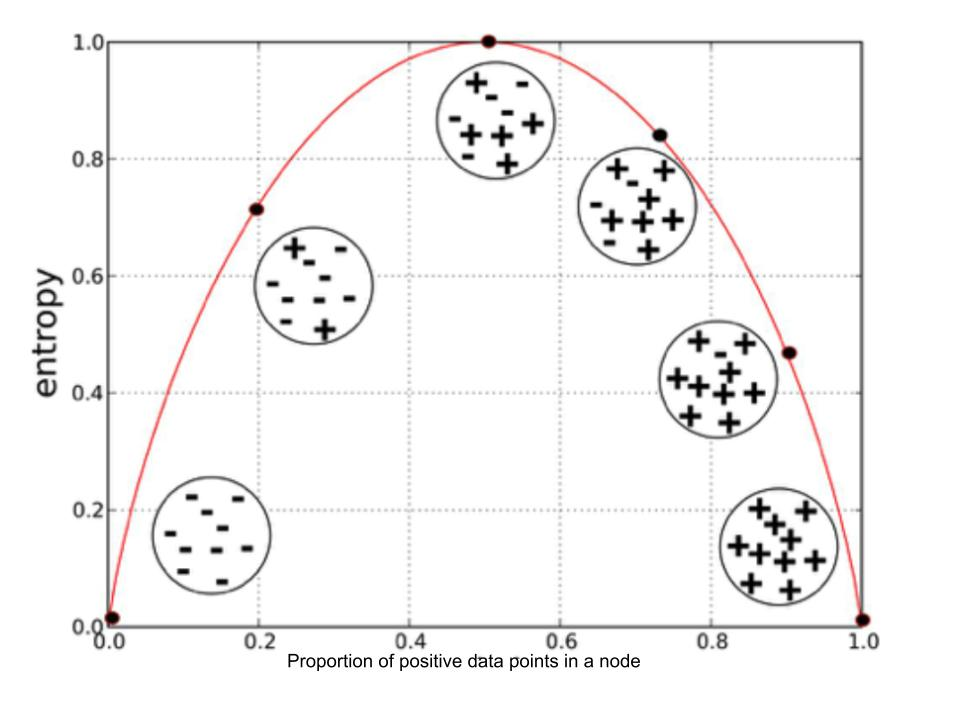

Entropy is also can be used in decision tree algorithms to define the rules in a decision tree, like splitting nodes until reaching pure nodes. In this way, enropy calculation is used in splitting, defining rules and calculating purity/disorder. 

## Weather Example

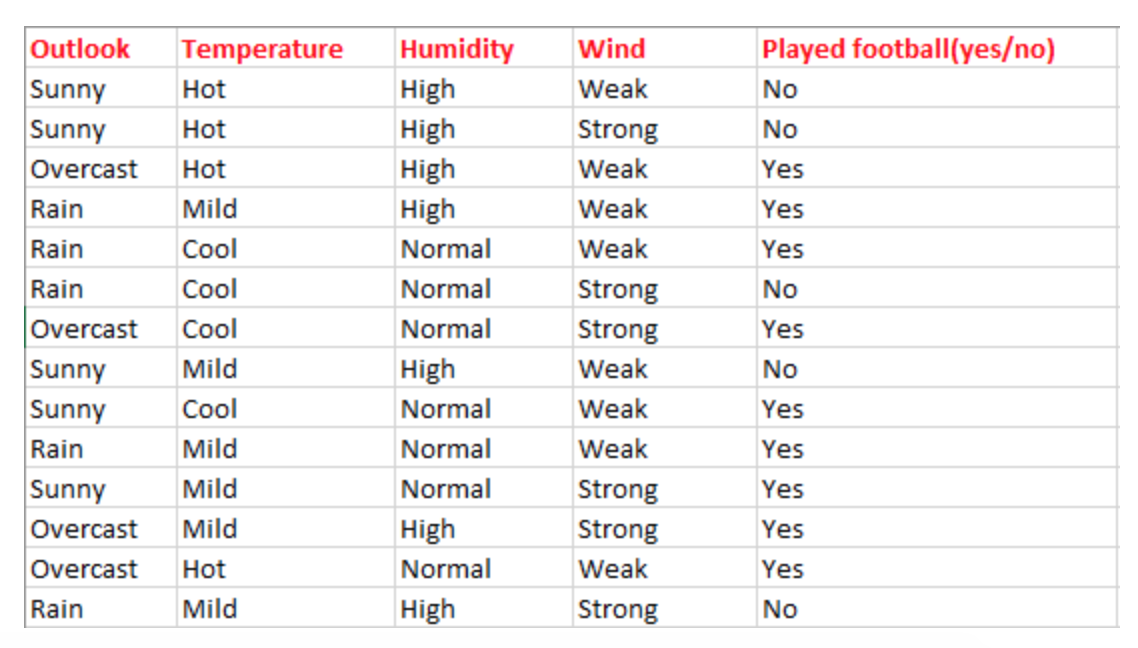

In [269]:
outlook =     [1,1,0,-1,-1,-1,0,1,1,-1,1,0,0,-1] #1 for sunny, 0 for overcast, -1 for rainy
temperature = [1,1,1,0,-1,-1,-1,0,-1,-1,-1,-1,1,0] #1 for hot, 0 for mild, -1 for cool
humidity = [1,1,1,1,0,0,0,1,0,0,0,1,0,1] #1 for high, 0 for normal
wind = [0,1,0,0,0,1,1,0,0,0,1,1,0,1] #1 for stron, 0 for weak
outcome = [0,0,1,1,1,0,1,0,1,1,1,1,1,0] #1 for playyed football, 0 for not play football

In [270]:
df = pd.DataFrame(np.c_[outlook,temperature,humidity,wind,outcome],
      columns = ["outlook","temperature","humidity","wind","outcome"])
df

,outlook,temperature,humidity,wind,outcome
0,1,1,1,0,0
1,1,1,1,1,0
2,0,1,1,0,1
3,-1,0,1,0,1
4,-1,-1,0,0,1
5,-1,-1,0,1,0
6,0,-1,0,1,1
7,1,0,1,0,0
8,1,-1,0,0,1
9,-1,-1,0,0,1


First Split with Outlook

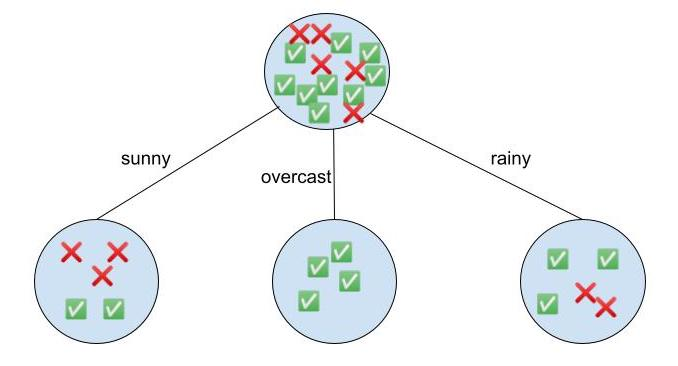

In [271]:
df_sunny=df[df.outlook == 1]
df_overcast=df[df.outlook == 0]
df_rainy=df[df.outlook == -1]

keys = [i for i in range(2)]
dct = {key: 0 for key in keys}
for i in df_sunny.outcome:
  dct[i]+=1
probs = [i/len(df_sunny) for i in list(dct.values())]
#print(probs)
print("Entropy of sunny dataframe:", getEntropy(probs))

dct = {key: 0 for key in keys}
for i in df_overcast.outcome:
  dct[i]+=1
probs = [i/len(df_overcast) for i in list(dct.values())]
#print(probs)
print("Entropy of overcast dataframe:", getEntropy(probs))

dct = {key: 0 for key in keys}
for i in df_rainy.outcome:
  dct[i]+=1
probs = [i/len(df_rainy) for i in list(dct.values())]
#print(probs)
print("Entropy of rainy dataframe:", getEntropy(probs))

Entropy of sunny dataframe: 0.9709505944546687
Entropy of overcast dataframe: 0.0
Entropy of rainy dataframe: 0.9709505944546687


As calculated above, after we split the dataframe based on outlook values, in sunny dataframe, we have three 0 values and two 1 values as outcome. Calculated entropy is 0.9709505944546687.

In [272]:
df_sunny

,outlook,temperature,humidity,wind,outcome
0,1,1,1,0,0
1,1,1,1,1,0
7,1,0,1,0,0
8,1,-1,0,0,1
10,1,-1,0,1,1


After split on outlook values the entropy on of the rainy dataframe on outcome is 0.9709505944546687.

In [273]:
df_rainy

,outlook,temperature,humidity,wind,outcome
3,-1,0,1,0,1
4,-1,-1,0,0,1
5,-1,-1,0,1,0
9,-1,-1,0,0,1
13,-1,0,1,1,0


After split on outlook values the entropy on of the overcast dataframe is 0. Which means, we reach the pure node in that table. We can conclude that if the outlook is overcast, playing football is always possible. Moreover, since we reached the pure node, there are no further split on this node is necessary.

In [274]:
df_overcast

,outlook,temperature,humidity,wind,outcome
2,0,1,1,0,1
6,0,-1,0,1,1
11,0,-1,1,1,1
12,0,1,0,0,1


## Second Split on Sunny Dataframe with Humidity

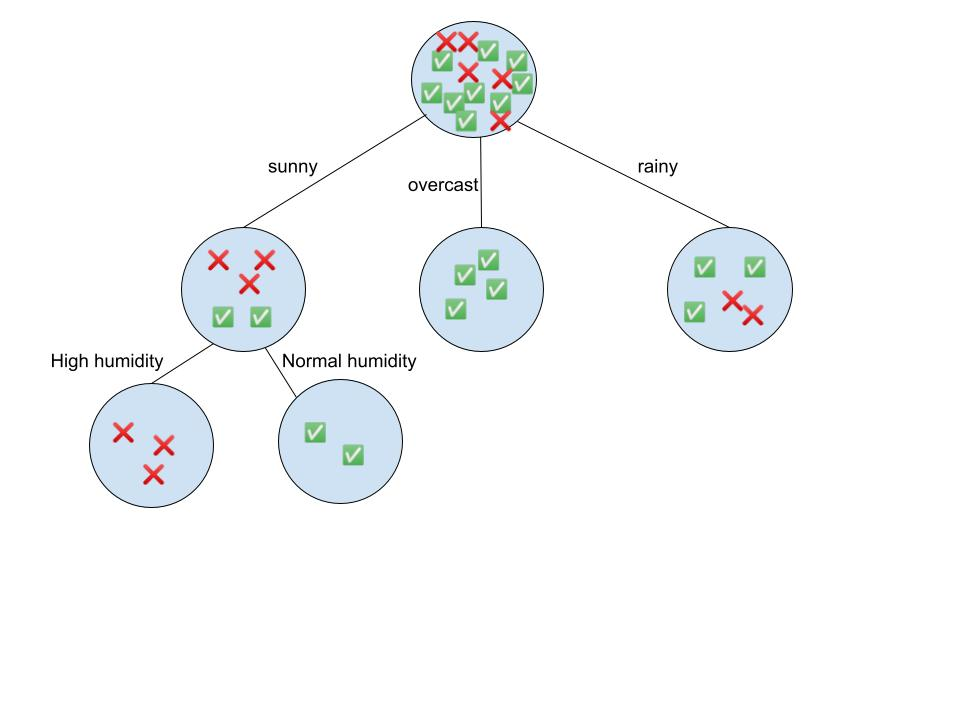

In [275]:
df_h0=df_sunny[df_sunny.humidity == 0]
df_h1=df_sunny[df_sunny.humidity == 1]

keys = [i for i in range(2)]
dct = {key: 0 for key in keys}
for i in df_h0.outcome:
  dct[i]+=1
probs = [i/len(df_h0) for i in list(dct.values())]
#print(probs)
print("Entropy of sunny and humidity = 0:", getEntropy(probs))

dct = {key: 0 for key in keys}
for i in df_h1.outcome:
  dct[i]+=1
probs = [i/len(df_h1) for i in list(dct.values())]
#print(probs)
print("Entropy of sunny and humidity = 1:", getEntropy(probs))


Entropy of sunny and humidity = 0: 0.0
Entropy of sunny and humidity = 1: 0.0


After splitting the sunny dataframe based on humidity values, we reach outcome = 0 for all rows satisfies outlook = sunny and humidity = high. We get outcome = 1 for all rows satisfies outlook = sunny and humidity = normal. Therefore, our nodes are pure and the entropy is 0 in these nodes.

In [276]:
df_h0

,outlook,temperature,humidity,wind,outcome
8,1,-1,0,0,1
10,1,-1,0,1,1


In [277]:
df_h1

,outlook,temperature,humidity,wind,outcome
0,1,1,1,0,0
1,1,1,1,1,0
7,1,0,1,0,0


## Second Split on Rainy Dataframe with Wind

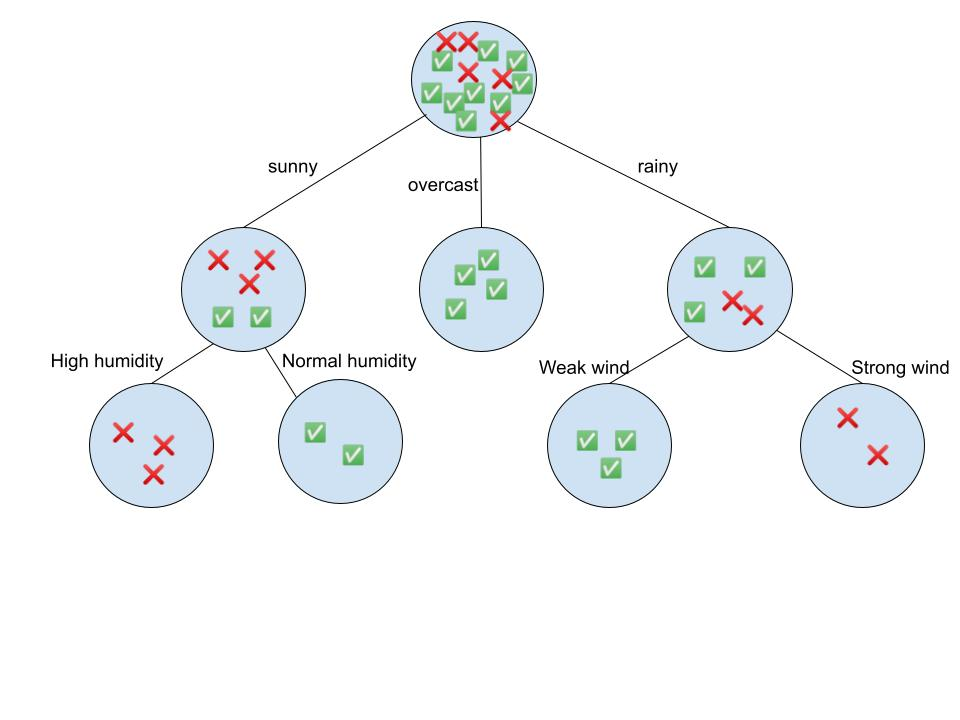

In [278]:
df_w0=df_rainy[df_rainy.wind == 0]
df_w1=df_rainy[df_rainy.wind == 1]

keys = [i for i in range(2)]
dct = {key: 0 for key in keys}
for i in df_w0.outcome:
  dct[i]+=1
probs = [i/len(df_w0) for i in list(dct.values())]
#print(probs)
print("Entropy of rainy and wind = 0:", getEntropy(probs))

dct = {key: 0 for key in keys}
for i in df_w1.outcome:
  dct[i]+=1
probs = [i/len(df_w1) for i in list(dct.values())]
#print(probs)
print("Entropy of rainy and wind = 1:", getEntropy(probs))


Entropy of rainy and wind = 0: 0.0
Entropy of rainy and wind = 1: 0.0


After these splits, all leaf nodes are pure, each leaf nodes' entropy is equal to 0, there is no disorder/unpredictability in these nodes' results.

In [279]:
df_overcast

,outlook,temperature,humidity,wind,outcome
2,0,1,1,0,1
6,0,-1,0,1,1
11,0,-1,1,1,1
12,0,1,0,0,1


In [280]:
df_h0

,outlook,temperature,humidity,wind,outcome
8,1,-1,0,0,1
10,1,-1,0,1,1


In [281]:
df_h1

,outlook,temperature,humidity,wind,outcome
0,1,1,1,0,0
1,1,1,1,1,0
7,1,0,1,0,0


In [282]:
df_w0

,outlook,temperature,humidity,wind,outcome
3,-1,0,1,0,1
4,-1,-1,0,0,1
9,-1,-1,0,0,1


In [283]:
df_w1

,outlook,temperature,humidity,wind,outcome
5,-1,-1,0,1,0
13,-1,0,1,1,0


# Boston House Prices Decision Tree with Entropy

In [284]:
from sklearn.datasets import load_boston
boston = load_boston()
l = boston.target
for i in range(len(l)):
  if l[i]>=5 and l[i]<10:
    l[i] = 0
  elif l[i]>=10 and l[i]<15:
    l[i] = 1
  elif l[i]>=15 and l[i]<20:
    l[i] = 2
  elif l[i]>=20 and l[i]<25:
    l[i] = 3
  elif l[i]>=25 and l[i]<30:
    l[i] = 4
  elif l[i]>=30 and l[i]<35:
    l[i] = 5
  elif l[i]>=35 and l[i]<40:
    l[i] = 6
  elif l[i]>=40 and l[i]<45:
    l[i] = 7
  elif l[i]>=45 and l[i]<=50:
    l[i] = 8

l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array([3., 3., 5., 5., 6., 4., 3., 4., 2., 2., 2., 2., 3., 3., 2., 2., 3.,
       2., 3., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2., 3., 1., 1., 1., 1.,
       1., 2., 3., 3., 3., 5., 5., 4., 4., 3., 3., 2., 3., 2., 1., 2., 2.,
       3., 4., 3., 2., 6., 3., 5., 3., 2., 2., 2., 3., 4., 5., 3., 2., 3.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 3., 3., 3., 3.,
       4., 3., 3., 3., 4., 3., 3., 3., 4., 3., 4., 3., 6., 7., 5., 4., 4.,
       2., 2., 3., 2., 2., 3., 2., 2., 3., 3., 2., 2., 2., 2., 3., 2., 3.,
       2., 3., 3., 3., 2., 2., 3., 2., 2., 2., 1., 2., 2., 3., 2., 2., 2.,
       2., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 3., 2., 2.,
       2., 2., 2., 1., 7., 3., 3., 4., 8., 8., 8., 3., 4., 8., 3., 3., 3.,
       2., 2., 3., 3., 3., 4., 3., 3., 4., 6., 6., 6., 6., 5., 4., 4., 8.,
       5., 4., 5., 6., 5., 6., 5., 4., 8., 5., 5., 5., 5., 5., 3., 7., 8.,
       8., 3., 3., 3., 3., 3., 3., 2., 3., 4., 3., 4., 3., 4., 3., 3., 4.,
       3., 4., 5., 7., 8.

In [285]:
boston_f = pd.DataFrame(boston.data)
boston_f

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [286]:
features = []
for i in range(len(boston.data)):
  sub = []
  for j in range(len(boston.data[0])):
    if boston.feature_names[j] != "RM":
      sub.append(int(round(boston.data[i][j]/10)*10)) #round nearest 10
    else:
      sub.append(int(boston.data[i][j])) #round to nearest int
  features.append(sub)
features

[[0, 20, 0, 0, 0, 6, 70, 0, 0, 300, 20, 400, 0],
 [0, 0, 10, 0, 0, 6, 80, 0, 0, 240, 20, 400, 10],
 [0, 0, 10, 0, 0, 7, 60, 0, 0, 240, 20, 390, 0],
 [0, 0, 0, 0, 0, 6, 50, 10, 0, 220, 20, 390, 0],
 [0, 0, 0, 0, 0, 7, 50, 10, 0, 220, 20, 400, 10],
 [0, 0, 0, 0, 0, 6, 60, 10, 0, 220, 20, 390, 10],
 [0, 10, 10, 0, 0, 6, 70, 10, 0, 310, 20, 400, 10],
 [0, 10, 10, 0, 0, 6, 100, 10, 0, 310, 20, 400, 20],
 [0, 10, 10, 0, 0, 5, 100, 10, 0, 310, 20, 390, 30],
 [0, 10, 10, 0, 0, 6, 90, 10, 0, 310, 20, 390, 20],
 [0, 10, 10, 0, 0, 6, 90, 10, 0, 310, 20, 390, 20],
 [0, 10, 10, 0, 0, 6, 80, 10, 0, 310, 20, 400, 10],
 [0, 10, 10, 0, 0, 5, 40, 10, 0, 310, 20, 390, 20],
 [0, 0, 10, 0, 0, 5, 60, 0, 0, 310, 20, 400, 10],
 [0, 0, 10, 0, 0, 6, 80, 0, 0, 310, 20, 380, 10],
 [0, 0, 10, 0, 0, 5, 60, 0, 0, 310, 20, 400, 10],
 [0, 0, 10, 0, 0, 5, 30, 0, 0, 310, 20, 390, 10],
 [0, 0, 10, 0, 0, 5, 80, 0, 0, 310, 20, 390, 10],
 [0, 0, 10, 0, 0, 5, 40, 0, 0, 310, 20, 290, 10],
 [0, 0, 10, 0, 0, 5, 70, 0, 0, 310, 2

In [287]:
cols = np.append(boston.feature_names,"price")

df = pd.DataFrame(data= np.c_[features, l], columns=cols, dtype = int)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0,20,0,0,0,6,70,0,0,300,20,400,0,3
1,0,0,10,0,0,6,80,0,0,240,20,400,10,3
2,0,0,10,0,0,7,60,0,0,240,20,390,0,5
3,0,0,0,0,0,6,50,10,0,220,20,390,0,5
4,0,0,0,0,0,7,50,10,0,220,20,400,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,10,0,0,6,70,0,0,270,20,390,10,3
502,0,0,10,0,0,6,80,0,0,270,20,400,10,3
503,0,0,10,0,0,6,90,0,0,270,20,400,10,3
504,0,0,10,0,0,6,90,0,0,270,20,390,10,3


In [288]:
def getPriceEntropy(df1, df2):
  keys = [i for i in range(9)]
  price_dict = {key: 0 for key in keys}
  for i in range(len(df1)):
      price_dict[df1.price.iloc[i]]+=1
  print(price_dict)
  price_total = sum(price_dict.values())
  tmp_dct = price_dict

  for i in keys:
      tmp_dct[i] = tmp_dct[i]/len(df1)
  prob_list = tmp_dct.values

  res1 = getEntropy(list(tmp_dct.values()))

  #####
  keys = [i for i in range(9)]
  price_dict = {key: 0 for key in keys}
  for i in range(len(df2)):
      price_dict[df2.price.iloc[i]]+=1
  print(price_dict)
  price_total = sum(price_dict.values())
  tmp_dct = price_dict

  for i in keys:
      tmp_dct[i] = tmp_dct[i]/len(df2)
  prob_list = tmp_dct.values

  res2 = getEntropy(list(tmp_dct.values()))
  return (res1,res2)


In [289]:
def splitPreparation(l):
  keys = l.unique()
  print(keys)
  dct = {key: 0 for key in keys}
  for i in range(len(l)):
      dct[l[i]]+=1
  print(dct)
  dct = collections.OrderedDict(sorted(dct.items()))
  print(dct)
  keys.sort()
  print(keys[0])
  print(list(dct.keys())[0])
  for i,v in enumerate(keys):
      print(i)
      if i != list(dct.keys())[0]:
        dct[keys[i]] += dct[keys[i-1]] 
  print(dct)
  

In [290]:
keys = [i for i in range(9)]
price_dict = {key: 0 for key in keys}
for i in range(len(df)):
    price_dict[df.price.iloc[i]]+=1
print(price_dict)
price_total = sum(price_dict.values())
tmp_dct = price_dict
#df.price = [price_dict[df.price.iloc[i]]/price_total for i in range(len(df))]

for i in keys:
    tmp_dct[i] = tmp_dct[i]/len(df)
prob_list = tmp_dct.values
print("Probs:", price_dict)
df

{0: 24, 1: 70, 2: 116, 3: 164, 4: 48, 5: 36, 6: 17, 7: 9, 8: 22}
Probs: {0: 0.04743083003952569, 1: 0.1383399209486166, 2: 0.22924901185770752, 3: 0.3241106719367589, 4: 0.09486166007905138, 5: 0.07114624505928854, 6: 0.03359683794466403, 7: 0.017786561264822136, 8: 0.043478260869565216}


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0,20,0,0,0,6,70,0,0,300,20,400,0,3
1,0,0,10,0,0,6,80,0,0,240,20,400,10,3
2,0,0,10,0,0,7,60,0,0,240,20,390,0,5
3,0,0,0,0,0,6,50,10,0,220,20,390,0,5
4,0,0,0,0,0,7,50,10,0,220,20,400,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,10,0,0,6,70,0,0,270,20,390,10,3
502,0,0,10,0,0,6,80,0,0,270,20,400,10,3
503,0,0,10,0,0,6,90,0,0,270,20,400,10,3
504,0,0,10,0,0,6,90,0,0,270,20,390,10,3


In [291]:
from scipy.stats import entropy
sum(tmp_dct.values())
print("Entropy of prices:",getEntropy(list(tmp_dct.values())))
print("Entropy of prices with built-in method:",entropy(list(tmp_dct.values()),base=2))

Entropy of prices: 2.675538190491908
Entropy of prices with built-in method: 2.675538190491908


Based on the entropy we found, we could guess a price of a randomly selected house will be in category 3, (price>=20 and price<25). Because probability of a house which is priced between this range has the highest probability (3: 0.3241106719367589).

# First Split

## Split Dataset Based on Room Number

In [292]:
print(min(df.RM))
print(max(df.RM))

keys = [i for i in range(11)]
rm_dict = {key: 0 for key in keys}
for i in range(len(df)):
    rm_dict[df.RM.iloc[i]]+=1
print(rm_dict)
rm_total = sum(rm_dict.values())
# df.RM = [rm_dict[df.RM.iloc[i]]/rm_total for i in range(len(df))]
# df
for i,v in enumerate(keys):
  if i != list(rm_dict.keys())[0]:
    rm_dict[keys[i]] += rm_dict[keys[i-1]] #trying to find a logical mid point of room number

print(rm_dict)
print(len(df)/2) #nearest point to len(df)/2 ~ noOfRooms = 5
#Therefore I will split dataset like df1 = df[noOfRooms<=5] and df2 = df[noOfRooms>5]

df_p1 = df[df.RM<=5]
df_p2 = df[df.RM>5]


3
8
{0: 0, 1: 0, 2: 0, 3: 2, 4: 13, 5: 158, 6: 269, 7: 51, 8: 13, 9: 0, 10: 0}
{0: 0, 1: 0, 2: 0, 3: 2, 4: 15, 5: 173, 6: 442, 7: 493, 8: 506, 9: 506, 10: 506}
253.0


In [293]:
# print("Entropy of df[df.RM<=5]",getPriceEntropy(df_p1.price))
# print("Entropy of df[df.RM<=5]",getPriceEntropy(df_p2.price))
keys = [i for i in range(9)]
price_dict = {key: 0 for key in keys}
for i in range(len(df_p1)):
    price_dict[df_p1.price.iloc[i]]+=1
print(price_dict)
price_total = sum(price_dict.values())
tmp_dct = price_dict

for i in keys:
    tmp_dct[i] = tmp_dct[i]/len(df_p1)
prob_list = tmp_dct.values

print("Entropy of prices in df[df.RM<=5]:",getEntropy(list(tmp_dct.values())))

#####
keys = [i for i in range(9)]
price_dict = {key: 0 for key in keys}
for i in range(len(df_p2)):
    price_dict[df_p2.price.iloc[i]]+=1
print(price_dict)
price_total = sum(price_dict.values())
tmp_dct = price_dict

for i in keys:
    tmp_dct[i] = tmp_dct[i]/len(df_p2)
prob_list = tmp_dct.values

print("Entropy of prices in df[df.RM>5]:",getEntropy(list(tmp_dct.values())))

{0: 17, 1: 34, 2: 68, 3: 49, 4: 3, 5: 0, 6: 0, 7: 0, 8: 2}
Entropy of prices in df[df.RM<=5]: 2.0110227480263254
{0: 7, 1: 36, 2: 48, 3: 115, 4: 45, 5: 36, 6: 17, 7: 9, 8: 20}
Entropy of prices in df[df.RM>5]: 2.7373850187280566


## Split Based on Age

In [294]:
print(min(df.RM))
print(max(df.RM))

keys = [i for i in range(0,110,10)]
print(keys)
age_dict = {key: 0 for key in keys}
for i in range(len(df)):
    age_dict[df.AGE.iloc[i]]+=1
print(age_dict)
for i,v in enumerate(keys):
  if i != list(age_dict.keys())[0]:
    age_dict[keys[i]] += age_dict[keys[i-1]] #trying to find a logical mid point of age
print(age_dict)
df_a1 = df[df.AGE<=40]
df_a2 = df[df.AGE>50]

3
8
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
{0: 1, 10: 16, 20: 32, 30: 42, 40: 36, 50: 39, 60: 32, 70: 45, 80: 53, 90: 97, 100: 113}
{0: 1, 10: 17, 20: 49, 30: 91, 40: 127, 50: 166, 60: 198, 70: 243, 80: 296, 90: 393, 100: 506}


In [295]:
keys = [i for i in range(9)]
price_dict = {key: 0 for key in keys}
for i in range(len(df_a1)):
    price_dict[df_a1.price.iloc[i]]+=1
print(price_dict)
price_total = sum(price_dict.values())
tmp_dct = price_dict

for i in keys:
    tmp_dct[i] = tmp_dct[i]/len(df_a1)
prob_list = tmp_dct.values

print("Entropy of prices in df[df.AGE<=40]:",getEntropy(list(tmp_dct.values())))

#####
keys = [i for i in range(9)]
price_dict = {key: 0 for key in keys}
for i in range(len(df_a2)):
    price_dict[df_a2.price.iloc[i]]+=1
print(price_dict)
price_total = sum(price_dict.values())
tmp_dct = price_dict

for i in keys:
    tmp_dct[i] = tmp_dct[i]/len(df_a2)
prob_list = tmp_dct.values

print("Entropy of prices in df[df.RM>50]:",getEntropy(list(tmp_dct.values())))

{0: 0, 1: 0, 2: 10, 3: 59, 4: 22, 5: 20, 6: 7, 7: 4, 8: 5}
Entropy of prices in df[df.AGE<=40]: 2.2319728497813776
{0: 24, 1: 70, 2: 98, 3: 83, 4: 25, 5: 13, 6: 8, 7: 4, 8: 15}
Entropy of prices in df[df.RM>50]: 2.6115549692469053


## Split Based on Weighted Distances to Five Boston Employment Centres

In [296]:
df_d1 = df[df.DIS==0]
df_d2 = df[df.DIS==10]

In [297]:
keys = [i for i in range(9)]
price_dict = {key: 0 for key in keys}
for i in range(len(df_d1)):
    price_dict[df_d1.price.iloc[i]]+=1
print(price_dict)
price_total = sum(price_dict.values())
tmp_dct = price_dict

for i in keys:
    tmp_dct[i] = tmp_dct[i]/len(df_d1)
prob_list = tmp_dct.values

print("Entropy of prices in df[df.DIS==0]:",getEntropy(list(tmp_dct.values())))

#####
keys = [i for i in range(9)]
price_dict = {key: 0 for key in keys}
for i in range(len(df_d2)):
    price_dict[df_d2.price.iloc[i]]+=1
print(price_dict)
price_total = sum(price_dict.values())
tmp_dct = price_dict

for i in keys:
    tmp_dct[i] = tmp_dct[i]/len(df_d2)
prob_list = tmp_dct.values

print("Entropy of prices in df[df.DIS==10]:",getEntropy(list(tmp_dct.values())))

{0: 24, 1: 69, 2: 89, 3: 105, 4: 31, 5: 19, 6: 11, 7: 6, 8: 17}
Entropy of prices in df[df.DIS==0]: 2.6856677169605123
{0: 0, 1: 1, 2: 27, 3: 59, 4: 17, 5: 17, 6: 6, 7: 3, 8: 5}
Entropy of prices in df[df.DIS==10]: 2.2893641744271194


## Split Based on Crime Rate per Town

In [298]:
keys = df.CRIM.unique()
crim_dict = {key: 0 for key in keys}
for i in range(len(df)):
    crim_dict[df.CRIM.iloc[i]]+=1
print(crim_dict)
for i,v in enumerate(keys):
    if i != list(crim_dict.keys())[0]:
      crim_dict[keys[i]] += crim_dict[keys[i-1]] #trying to find a logical mid point of age
print(crim_dict)
df_c1 = df[df.CRIM<10]
df_c2 = df[df.CRIM>=10]

{0: 400, 10: 76, 20: 19, 90: 1, 40: 3, 30: 3, 70: 2, 50: 2}
{0: 400, 10: 476, 20: 495, 90: 496, 40: 499, 30: 502, 70: 504, 50: 506}


In [299]:
keys = [i for i in range(9)]
price_dict = {key: 0 for key in keys}
for i in range(len(df_c1)):
    price_dict[df_c1.price.iloc[i]]+=1
print(price_dict)
price_total = sum(price_dict.values())
tmp_dct = price_dict

for i in keys:
    tmp_dct[i] = tmp_dct[i]/len(df_c1)
prob_list = tmp_dct.values

print("Entropy of prices in df[df.CRIM<10]:",getEntropy(list(tmp_dct.values())))

#####
keys = [i for i in range(9)]
price_dict = {key: 0 for key in keys}
for i in range(len(df_c2)):
    price_dict[df_c2.price.iloc[i]]+=1
print(price_dict)
price_total = sum(price_dict.values())
tmp_dct = price_dict

for i in keys:
    tmp_dct[i] = tmp_dct[i]/len(df_c2)
prob_list = tmp_dct.values

print("Entropy of prices in df[df.CRIM>=10]:",getEntropy(list(tmp_dct.values())))

{0: 2, 1: 23, 2: 97, 3: 153, 4: 45, 5: 36, 6: 17, 7: 9, 8: 18}
Entropy of prices in df[df.CRIM<10]: 2.486507831423737
{0: 22, 1: 47, 2: 19, 3: 11, 4: 3, 5: 0, 6: 0, 7: 0, 8: 4}
Entropy of prices in df[df.CRIM>=10]: 2.0987465894549793


## Split Based on Proportion of Residential Land Zoned for Lots Over 25,000 sq.ft.

In [300]:
import collections
keys = df.ZN.unique()
print(keys)
zn_dict = {key: 0 for key in keys}
for i in range(len(df)):
    zn_dict[df.ZN.iloc[i]]+=1
print(zn_dict)
zn_dict = collections.OrderedDict(sorted(zn_dict.items()))
print(zn_dict)
keys.sort()
print(list(zn_dict.keys())[0])
for i,v in enumerate(keys):
    if i != list(zn_dict.keys())[0]:
      zn_dict[keys[i]] += zn_dict[keys[i-1]] 
print(zn_dict)
df_z1 = df[df.ZN<10]
df_z2 = df[df.ZN>=10]

[ 20   0  10  80  90 100  30  40  60  50  70]
{20: 47, 0: 372, 10: 10, 80: 22, 90: 5, 100: 5, 30: 16, 40: 16, 60: 7, 50: 3, 70: 3}
OrderedDict([(0, 372), (10, 10), (20, 47), (30, 16), (40, 16), (50, 3), (60, 7), (70, 3), (80, 22), (90, 5), (100, 5)])
0
OrderedDict([(0, 372), (10, 382), (20, 429), (30, 445), (40, 461), (50, 464), (60, 471), (70, 474), (80, 496), (90, 501), (100, 506)])


In [301]:
r1,r2 = getPriceEntropy(df_z1,df_z2)
print("Entropy of prices in df[df.ZN<10]:",r1)
print("Entropy of prices in df[df.ZN>=10]:",r2)

{0: 24, 1: 70, 2: 99, 3: 116, 4: 30, 5: 9, 6: 7, 7: 4, 8: 13}
{0: 0, 1: 0, 2: 17, 3: 48, 4: 18, 5: 27, 6: 10, 7: 5, 8: 9}
Entropy of prices in df[df.ZN<10]: 2.511163500092954
Entropy of prices in df[df.ZN>=10]: 2.4812837624239084


## Split Based on Proportion of Non-retail Business Acres per Town

In [302]:
import collections
keys = df.INDUS.unique()
print(keys)
ind_dict = {key: 0 for key in keys}
for i in range(len(df)):
    ind_dict[df.INDUS.iloc[i]]+=1
print(ind_dict)
ind_dict = collections.OrderedDict(sorted(ind_dict.items()))
print(ind_dict)
keys.sort()
print(list(ind_dict.keys())[0])
for i,v in enumerate(keys):
    if i != list(ind_dict.keys())[0]:
      ind_dict[keys[i]] += ind_dict[keys[i-1]] 
print(ind_dict)
df_i1 = df[df.INDUS<=10]
df_i2 = df[df.INDUS>10]

[ 0 10 20 30]
{0: 120, 10: 194, 20: 180, 30: 12}
OrderedDict([(0, 120), (10, 194), (20, 180), (30, 12)])
0
OrderedDict([(0, 120), (10, 314), (20, 494), (30, 506)])


In [303]:
r1,r2 = getPriceEntropy(df_i1,df_i2)
print("Entropy of prices in df[df.INDUS<=10]:",r1)
print("Entropy of prices in df[df.INDUS>10]:",r2)

{0: 0, 1: 11, 2: 62, 3: 128, 4: 39, 5: 36, 6: 17, 7: 8, 8: 13}
{0: 24, 1: 59, 2: 54, 3: 36, 4: 9, 5: 0, 6: 0, 7: 1, 8: 9}
Entropy of prices in df[df.INDUS<=10]: 2.4441287416507436
Entropy of prices in df[df.INDUS>10]: 2.319051484448404


## Split Based on Charles River Dummy Variable (= 1 if tract bounds river; 0 otherwise)

In [304]:
import collections
keys = df.CHAS.unique()
print(keys)
# all values are 0, wont be continue on this variable


[0]


## Split Based on Nitric Oxides Concentration 

In [305]:
keys = df.NOX.unique()
print(keys)
# all values are 0, wont be continue on this variable

[0]


## Split Based on Index of Accessibility to Radial Highways

In [306]:
keys = df.RAD.unique()
print(keys)
rad_dict = {key: 0 for key in keys}
for i in range(len(df)):
    rad_dict[df.RAD.iloc[i]]+=1
print(rad_dict)
rad_dict = collections.OrderedDict(sorted(rad_dict.items()))
print(rad_dict)
keys.sort()
print(list(rad_dict.keys())[0])
for i,v in enumerate(keys):
    if i != list(rad_dict.keys())[0]:
      rad_dict[keys[i]] += rad_dict[keys[i-1]] 
print(rad_dict)
df_r1 = df[df.RAD<10]
# print(df[df.RAD=>10])
df_r2 = df[df.RAD>=10]

[ 0 10 20]
{0: 307, 10: 67, 20: 132}
OrderedDict([(0, 307), (10, 67), (20, 132)])
0
OrderedDict([(0, 307), (10, 374), (20, 506)])


In [307]:
r1,r2 = getPriceEntropy(df_r1,df_r2)
print("Entropy of prices in df[df.RAD<10]:",r1)
print("Entropy of prices in df[df.RAD<10]:",r2)

{0: 2, 1: 21, 2: 72, 3: 116, 4: 32, 5: 29, 6: 15, 7: 6, 8: 14}
{0: 22, 1: 49, 2: 44, 3: 48, 4: 16, 5: 7, 6: 2, 7: 3, 8: 8}
Entropy of prices in df[df.RAD<10]: 2.5217149980641222
Entropy of prices in df[df.RAD<10]: 2.6319621020366686


## Split Based on Full-value Property-tax Rate per $10,000

In [308]:
splitPreparation(df.TAX)
df_t1 = df[df.TAX <=320]
df_t2 = df[df.TAX >320]
r1,r2 = getPriceEntropy(df_t1,df_t2)
print("Entropy of prices in df[df.TAX <=320]:",r1)
print("Entropy of prices in df[df.TAX >320]:",r2)

[300 240 220 310 280 250 230 470 260 340 400 270 380 430 190 440 330 350
 320 200 290 360 420 370 410 670 710 390]
{300: 33, 240: 11, 220: 27, 310: 48, 280: 37, 250: 11, 230: 10, 470: 1, 260: 16, 340: 7, 400: 44, 270: 12, 380: 11, 430: 12, 190: 16, 440: 15, 330: 18, 350: 5, 320: 2, 200: 1, 290: 16, 360: 3, 420: 1, 370: 2, 410: 2, 670: 132, 710: 5, 390: 8}
OrderedDict([(190, 16), (200, 1), (220, 27), (230, 10), (240, 11), (250, 11), (260, 16), (270, 12), (280, 37), (290, 16), (300, 33), (310, 48), (320, 2), (330, 18), (340, 7), (350, 5), (360, 3), (370, 2), (380, 11), (390, 8), (400, 44), (410, 2), (420, 1), (430, 12), (440, 15), (470, 1), (670, 132), (710, 5)])
190
190
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
OrderedDict([(190, 21), (200, 22), (220, 49), (230, 59), (240, 70), (250, 81), (260, 97), (270, 109), (280, 146), (290, 162), (300, 195), (310, 243), (320, 245), (330, 263), (340, 270), (350, 275), (360, 278), (370, 280), (380, 291), (390, 299), (4

## Split Based on Pupil-teacher Ratio by Town

In [309]:
splitPreparation(df.PTRATIO)
df_p1 = df[df.PTRATIO <=10]
df_p2 = df[df.PTRATIO >10]
r1,r2 = getPriceEntropy(df_p1,df_p2)
print("Entropy of prices in df[df.PTRATIO <=10]:",r1)
print("Entropy of prices in df[df.PTRATIO >10]:",r2)

[20 10]
{20: 448, 10: 58}
OrderedDict([(10, 58), (20, 448)])
10
10
0
1
OrderedDict([(10, 506), (20, 954)])
{0: 0, 1: 5, 2: 11, 3: 11, 4: 3, 5: 7, 6: 4, 7: 4, 8: 13}
{0: 24, 1: 65, 2: 105, 3: 153, 4: 45, 5: 29, 6: 13, 7: 5, 8: 9}
Entropy of prices in df[df.PTRATIO <=10]: 2.819546092078292
Entropy of prices in df[df.PTRATIO >10]: 2.5726927632007675


## Split Based on % Lower Status of the Population

In [310]:
splitPreparation(df.LSTAT)
df_l1 = df[df.LSTAT <=10]
df_l2 = df[df.LSTAT >10]
r1,r2 = getPriceEntropy(df_l1,df_l2)
print("Entropy of prices in df[df.LSTAT <=10]:",r1)
print("Entropy of prices in df[df.LSTAT >10]:",r2)

[ 0 10 20 30 40]
{0: 62, 10: 282, 20: 128, 30: 32, 40: 2}
OrderedDict([(0, 62), (10, 282), (20, 128), (30, 32), (40, 2)])
0
0
0
1
2
3
4
OrderedDict([(0, 62), (10, 344), (20, 472), (30, 504), (40, 506)])
{0: 0, 1: 3, 2: 60, 3: 151, 4: 46, 5: 36, 6: 17, 7: 9, 8: 22}
{0: 24, 1: 67, 2: 56, 3: 13, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0}
Entropy of prices in df[df.LSTAT <=10]: 2.355066272633597
Entropy of prices in df[df.LSTAT >10]: 1.83500637480414


## Split Based on Median Value of Owner-occupied Homes in $1000’s

In [311]:
keys = df.B.unique()
print(keys)
b_dict = {key: 0 for key in keys}
for i in range(len(df)):
    b_dict[df.B.iloc[i]]+=1
print(b_dict)
b_dict = collections.OrderedDict(sorted(b_dict.items()))
print(b_dict)
keys.sort()
print(list(b_dict.keys())[0])
for i,v in enumerate(keys):
    if i != list(b_dict.keys())[0]:
      b_dict[keys[i]] += b_dict[keys[i-1]] 
print(b_dict)
df_b1 = df[df.B<=10]
df_b2 = df[df.B>10]
r1,r2 = getPriceEntropy(df_b1,df_b2)
print("Entropy of prices in df[df.B <=380]:",r1)
print("Entropy of prices in df[df.B >380]:",r2)

[400 390 380 290 300 310 360 230 250 370  70 340 260 170 350 320  90 240
 330 130 180   0  40  30 210  20  50  10 100  60  80 110 270]
{400: 167, 390: 162, 380: 52, 290: 4, 300: 4, 310: 2, 360: 12, 230: 2, 250: 1, 370: 22, 70: 2, 340: 8, 260: 3, 170: 2, 350: 13, 320: 6, 90: 3, 240: 2, 330: 5, 130: 2, 180: 1, 0: 5, 40: 2, 30: 3, 210: 1, 20: 5, 50: 2, 10: 4, 100: 4, 60: 1, 80: 2, 110: 1, 270: 1}
OrderedDict([(0, 5), (10, 4), (20, 5), (30, 3), (40, 2), (50, 2), (60, 1), (70, 2), (80, 2), (90, 3), (100, 4), (110, 1), (130, 2), (170, 2), (180, 1), (210, 1), (230, 2), (240, 2), (250, 1), (260, 3), (270, 1), (290, 4), (300, 4), (310, 2), (320, 6), (330, 5), (340, 8), (350, 13), (360, 12), (370, 22), (380, 52), (390, 162), (400, 167)])
0
OrderedDict([(0, 5), (10, 9), (20, 14), (30, 17), (40, 19), (50, 21), (60, 22), (70, 24), (80, 26), (90, 29), (100, 33), (110, 34), (130, 36), (170, 38), (180, 39), (210, 40), (230, 42), (240, 44), (250, 45), (260, 48), (270, 49), (290, 53), (300, 57), (310, 5

# Second Split

In [312]:
def splitPreparation2(l):
  keys = l.unique()
  print(keys)
  dct = {key: 0 for key in keys}
  for i in range(len(l)):
      print(dct)
      dct[l[i]]+=1
  print("a")
  print(dct)
  print("t")
  dct = collections.OrderedDict(sorted(dct.items()))
  print(dct)
  keys.sort()
  print(list(dct.keys())[0])
  for i,v in enumerate(keys):
      if i != list(dct.keys())[0]:
        dct[keys[i]] += dct[keys[i-1]] 
  print(dct)

## Split Based on Room Number

In [313]:
df_l1 = df[df.LSTAT <=10]
df_l2 = df[df.LSTAT >10]
keys = df_l1.RM.unique()
print(keys)
dct = {key: 0 for key in keys}
for i in range(len(df_l1)):
    dct[df_l1.RM.iloc[i]]+=1
print(dct)
dct = collections.OrderedDict(sorted(dct.items()))
print(dct)
keys.sort()
print(list(dct.keys())[0])
for i,v in enumerate(keys):
    if i != list(dct.keys())[0]:
      dct[keys[i]] += dct[keys[i-1]] 
print(dct)
df_r1 = df_l1[df_l1.RM<=6]
df_r2 = df_l1[df_l1.RM>6]
r1,r2 = getPriceEntropy(df_r1,df_r2)
print("Entropy of prices in df_1l[df_l1.RM<=6]:",r1)
print("Entropy of prices in df_1l[df_l1.RM>6]:",r2)
print()
keys = df_l2.RM.unique()
print(keys)
dct = {key: 0 for key in keys}
for i in range(len(df_l2)):
    dct[df_l2.RM.iloc[i]]+=1
print(dct)
dct = collections.OrderedDict(sorted(dct.items()))
print(dct)
keys.sort()
print(list(dct.keys())[0])
for i,v in enumerate(keys):
    if i != list(dct.keys())[0]:
      dct[keys[i]] += dct[keys[i-1]] 
print(dct)
df_r1 = df_l2[df_l2.RM <=6]
df_r2 = df_l2[df_l2.RM >6]
r1,r2 = getPriceEntropy(df_l1,df_l2)
print("Entropy of prices in df[df.PTRATIO <=10]:",r1)
print("Entropy of prices in df[df.PTRATIO >10]:",r2)

[6 7 5 8 4 3]
{6: 202, 7: 50, 5: 74, 8: 13, 4: 3, 3: 2}
OrderedDict([(3, 2), (4, 3), (5, 74), (6, 202), (7, 50), (8, 13)])
3
OrderedDict([(3, 15), (4, 18), (5, 92), (6, 202), (7, 252), (8, 265)])
{0: 0, 1: 3, 2: 59, 3: 149, 4: 43, 5: 17, 6: 5, 7: 1, 8: 4}
{0: 0, 1: 0, 2: 1, 3: 2, 4: 3, 5: 19, 6: 12, 7: 8, 8: 18}
Entropy of prices in df_1l[df_l1.RM<=6]: 1.9069785259459902
Entropy of prices in df_1l[df_l1.RM>6]: 2.333728966480756

[6 5 4 7]
{6: 67, 5: 84, 4: 10, 7: 1}
OrderedDict([(4, 10), (5, 84), (6, 67), (7, 1)])
4
OrderedDict([(4, 11), (5, 95), (6, 162), (7, 163)])
{0: 0, 1: 3, 2: 60, 3: 151, 4: 46, 5: 36, 6: 17, 7: 9, 8: 22}
{0: 24, 1: 67, 2: 56, 3: 13, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0}
Entropy of prices in df[df.PTRATIO <=10]: 2.355066272633597
Entropy of prices in df[df.PTRATIO >10]: 1.83500637480414


## Split Based on Age

In [314]:
df1 = df[df.LSTAT <=10]
print("Len(df1)/2:",len(df1)/2)
df2 = df[df.LSTAT >10]
print("Len(df2)/2:",len(df2)/2)
keys = df1.AGE.unique()
print(keys)
dct = {key: 0 for key in keys}
for i in range(len(df1)):
    dct[df1.AGE.iloc[i]]+=1
print(dct)
dct = collections.OrderedDict(sorted(dct.items()))
print(dct)
keys.sort()
print(list(dct.keys())[0])
for i,v in enumerate(keys):
    if i != list(dct.keys())[0]:
      dct[keys[i]] += dct[keys[i-1]] 
print(dct)
df_r1 = df1[df1.AGE<=50]
df_r2 = df1[df1.AGE>50]
r1,r2 = getPriceEntropy(df_r1,df_r2)
print("Entropy of prices in df1[df1.AGE<=50]:",r1)
print("Entropy of prices in df1[df1.AGE>50]:",r2)
print()

keys = df2.AGE.unique()
print(keys)
dct = {key: 0 for key in keys}
for i in range(len(df2)):
    dct[df2.AGE.iloc[i]]+=1
print(dct)
dct = collections.OrderedDict(sorted(dct.items()))
print(dct)
keys.sort()
print(list(dct.keys())[0])
for i,v in enumerate(keys):
    if i != list(dct.keys())[0]:
      dct[keys[i]] += dct[keys[i-1]] 
print(dct)
df_r1 = df2[df2.AGE <=90]
df_r2 = df2[df2.AGE >90]
r1,r2 = getPriceEntropy(df_l1,df_l2)
print("Entropy of prices in df2[df2.AGE <=90]:",r1)
print("Entropy of prices in df2[df2.AGE >90]:",r2)

Len(df1)/2: 172.0
Len(df2)/2: 81.0
[ 70  80  60  50  30  40  90 100  20   0  10]
{70: 37, 80: 42, 60: 29, 50: 38, 30: 41, 40: 35, 90: 46, 100: 28, 20: 32, 0: 1, 10: 15}
OrderedDict([(0, 1), (10, 15), (20, 32), (30, 41), (40, 35), (50, 38), (60, 29), (70, 37), (80, 42), (90, 46), (100, 28)])
0
OrderedDict([(0, 1), (10, 16), (20, 48), (30, 89), (40, 124), (50, 162), (60, 191), (70, 228), (80, 270), (90, 316), (100, 344)])
{0: 0, 1: 0, 2: 18, 3: 77, 4: 23, 5: 23, 6: 9, 7: 5, 8: 7}
{0: 0, 1: 3, 2: 42, 3: 74, 4: 23, 5: 13, 6: 8, 7: 4, 8: 15}
Entropy of prices in df1[df1.AGE<=50]: 2.244322141280227
Entropy of prices in df1[df1.AGE>50]: 2.378768439238878

[100  90  40  80  60  70  50  10  30]
{100: 85, 90: 51, 40: 1, 80: 11, 60: 3, 70: 8, 50: 1, 10: 1, 30: 1}
OrderedDict([(10, 1), (30, 1), (40, 1), (50, 1), (60, 3), (70, 8), (80, 11), (90, 51), (100, 85)])
10
OrderedDict([(10, 86), (30, 87), (40, 88), (50, 89), (60, 92), (70, 100), (80, 111), (90, 162), (100, 247)])
{0: 0, 1: 3, 2: 60, 3: 151

## Split Based on Weighted Distances to Five Boston Employment Centres

In [315]:
df1 = df[df.LSTAT <=10]
print("Len(df1)/2:",len(df1)/2)
df2 = df[df.LSTAT >10]
print("Len(df2)/2:",len(df2)/2)
keys = df1.DIS.unique()
print(keys)
dct = {key: 0 for key in keys}
for i in range(len(df1)):
    dct[df1.DIS.iloc[i]]+=1
print(dct)
dct = collections.OrderedDict(sorted(dct.items()))
print(dct)
keys.sort()
print(list(dct.keys())[0])
for i,v in enumerate(keys):
    if i != list(dct.keys())[0]:
      dct[keys[i]] += dct[keys[i-1]] 
print(dct)
df_r1 = df1[df1.DIS==0]
df_r2 = df1[df1.DIS==10]
r1,r2 = getPriceEntropy(df_r1,df_r2)
print("Entropy of prices in df1[df1.DIS==0]:",r1)
print("Entropy of prices in df1[df1.DIS==0]:",r2)
print()

keys = df2.DIS.unique()
print(keys)
dct = {key: 0 for key in keys}
for i in range(len(df2)):
    dct[df2.DIS.iloc[i]]+=1
print(dct)
dct = collections.OrderedDict(sorted(dct.items()))
print(dct)
keys.sort()
print(list(dct.keys())[0])
for i,v in enumerate(keys):
    if i != list(dct.keys())[0]:
      dct[keys[i]] += dct[keys[i-1]] 
print(dct)
df_r1 = df2[df2.DIS ==0]
df_r2 = df2[df2.DIS ==10]
r1,r2 = getPriceEntropy(df_l1,df_l2)
print("Entropy of prices in df2[df2.DIS==0]:",r1)
print("Entropy of prices in df2[df2.DIS==0]:",r2)

Len(df1)/2: 172.0
Len(df2)/2: 81.0
[ 0 10]
{0: 219, 10: 125}
OrderedDict([(0, 219), (10, 125)])
0
OrderedDict([(0, 219), (10, 344)])
{0: 0, 1: 3, 2: 39, 3: 94, 4: 30, 5: 19, 6: 11, 7: 6, 8: 17}
{0: 0, 1: 0, 2: 21, 3: 57, 4: 16, 5: 17, 6: 6, 7: 3, 8: 5}
Entropy of prices in df1[df1.DIS==0]: 2.395861681383065
Entropy of prices in df1[df1.DIS==0]: 2.245187740918669

[10  0]
{10: 10, 0: 152}
OrderedDict([(0, 152), (10, 10)])
0
OrderedDict([(0, 152), (10, 162)])
{0: 0, 1: 3, 2: 60, 3: 151, 4: 46, 5: 36, 6: 17, 7: 9, 8: 22}
{0: 24, 1: 67, 2: 56, 3: 13, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0}
Entropy of prices in df2[df2.DIS==0]: 2.355066272633597
Entropy of prices in df2[df2.DIS==0]: 1.83500637480414


## Split Based on Median Value of Owner-occupied Homes in $1000’s

In [316]:
df1 = df[df.LSTAT <=10]
print("Len(df1)/2:",len(df1)/2)
df2 = df[df.LSTAT >10]
print("Len(df2)/2:",len(df2)/2)
keys = df1.B.unique()
print(keys)
dct = {key: 0 for key in keys}
for i in range(len(df1)):
    dct[df1.B.iloc[i]]+=1
print(dct)
dct = collections.OrderedDict(sorted(dct.items()))
print(dct)
keys.sort()
print(list(dct.keys())[0])
for i,v in enumerate(keys):
    if i != list(dct.keys())[0]:
      dct[keys[i]] += dct[keys[i-1]] 
print(dct)
df_r1 = df1[df1.B<=390]
df_r2 = df1[df1.B>390]
r1,r2 = getPriceEntropy(df_r1,df_r2)
print("Entropy of prices in df1[df1.B<=390]:",r1)
print("Entropy of prices in df1[df1.B>390]:",r2)
print()


keys = df2.B.unique()
print(keys)
dct = {key: 0 for key in keys}
for i in range(len(df2)):
    dct[df2.B.iloc[i]]+=1
print(dct)
dct = collections.OrderedDict(sorted(dct.items()))
print(dct)
keys.sort()
print(list(dct.keys())[0])
for i,v in enumerate(keys):
    if i != list(dct.keys())[0]:
      dct[keys[i]] += dct[keys[i-1]] 
print(dct)
df_r1 = df2[df2.B<=390]
df_r2 = df2[df2.B>390]
r1,r2 = getPriceEntropy(df_r1,df_r2)
print("Entropy of prices in df2[df2.B<=390]:",r1)
print("Entropy of prices in df2[df2.B>390]:",r2)
print()



Len(df1)/2: 172.0
Len(df2)/2: 81.0
[400 390 380 290 370 360  70 340 350 240 230 300 330 320 130   0  20 100]
{400: 120, 390: 130, 380: 42, 290: 3, 370: 18, 360: 6, 70: 1, 340: 4, 350: 9, 240: 1, 230: 1, 300: 1, 330: 3, 320: 1, 130: 1, 0: 1, 20: 1, 100: 1}
OrderedDict([(0, 1), (20, 1), (70, 1), (100, 1), (130, 1), (230, 1), (240, 1), (290, 3), (300, 1), (320, 1), (330, 3), (340, 4), (350, 9), (360, 6), (370, 18), (380, 42), (390, 130), (400, 120)])
0
OrderedDict([(0, 1), (20, 2), (70, 3), (100, 4), (130, 5), (230, 6), (240, 7), (290, 10), (300, 11), (320, 12), (330, 15), (340, 19), (350, 28), (360, 34), (370, 52), (380, 94), (390, 224), (400, 344)])
{0: 0, 1: 2, 2: 37, 3: 91, 4: 32, 5: 25, 6: 9, 7: 7, 8: 21}
{0: 0, 1: 1, 2: 23, 3: 60, 4: 14, 5: 11, 6: 8, 7: 2, 8: 1}
Entropy of prices in df1[df1.B<=390]: 2.434698819930557
Entropy of prices in df1[df1.B>390]: 2.108456616944859

[400 390 380 300 310 360 230 250 340 370 260 170 350 320  90 290 330 180
  40  30 210  20 130  50   0  10 100  6